In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#test and train

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
df=pd.read_csv(r"C:\\Users\\USER\\Downloads\\Desktop\\ML\\dataset\\house-prices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
df = df[['Home', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood'] + ['Price']]

In [6]:
df.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price
0,1,1790,2,2,2,No,East,114300
1,2,2030,4,2,3,No,East,114200
2,3,1740,3,2,1,No,East,114800
3,4,1980,3,2,3,No,East,94700
4,5,2130,3,3,3,No,East,119800


In [14]:
from sklearn.preprocessing import LabelEncoder

# Separate numerical and categorical columns
numerical_cols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Price']
categorical_cols = ['Home', 'Brick', 'Neighborhood']

# Convert categorical columns to numerical values using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create the correlation matrix



<Axes: >

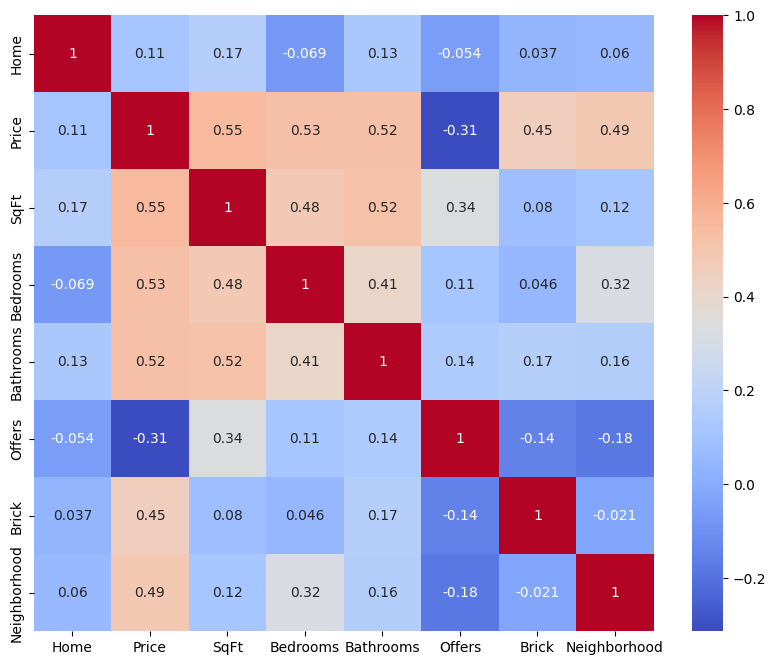

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')


In [ ]:
x=df.iloc[:,:-1]
y=df["Price"]

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# assuming x is a numpy array
x_df = pd.DataFrame(x)  # create a DataFrame from the numpy array
sc = StandardScaler()
x_scaled = pd.DataFrame(sc.fit_transform(x_df), columns=x_df.columns)
x

array([[-1.71857161, -0.6025848 , -1.00091648, -1.41532739, -0.86893879,
        -0.54276944, -0.69883624],
       [-1.69150749, -0.60632122,  0.13790405,  1.35050324, -0.86893879,
         0.396075  , -0.69883624],
       [-1.66444337, -0.58390272, -1.23817076, -0.03241208, -0.86893879,
        -1.48161388, -0.69883624],
       [-1.63737925, -1.33492252, -0.09935023, -0.03241208, -0.86893879,
         0.396075  , -0.69883624],
       [-1.61031513, -0.39708187,  0.6124126 , -0.03241208,  1.08236235,
         0.396075  , -0.69883624],
       [-1.58325101, -0.59137555, -1.04836734, -0.03241208, -0.86893879,
        -0.54276944, -0.69883624],
       [-1.55618689,  0.79109872, -0.81111306, -0.03241208,  1.08236235,
         0.396075  ,  1.4309504 ],
       [-1.52912277,  0.75747096,  0.75476517,  1.35050324, -0.86893879,
        -0.54276944, -0.69883624],
       [-1.50205865, -0.41950037,  0.51751089,  1.35050324, -0.86893879,
         0.396075  , -0.69883624],
       [-1.47499453, -0.9874

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge



In [ ]:
#linear regression
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.score(x_test,y_test)*100

100.0

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_squared_error(y_test, lr.predict(x_test))


5.994209555555745e-31

In [52]:
mean_absolute_error(y_test, lr.predict(x_test))

5.731593084761062e-16

In [53]:
#rmsr root mean square error

np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))

7.742228074369642e-16

In [38]:
x=df.iloc[:,:-1]

In [39]:
lr.coef_

array([-9.52298154e-17,  1.00000000e+00,  1.11022302e-16,  2.22044605e-16,
        1.66533454e-16, -4.99600361e-16,  0.00000000e+00])

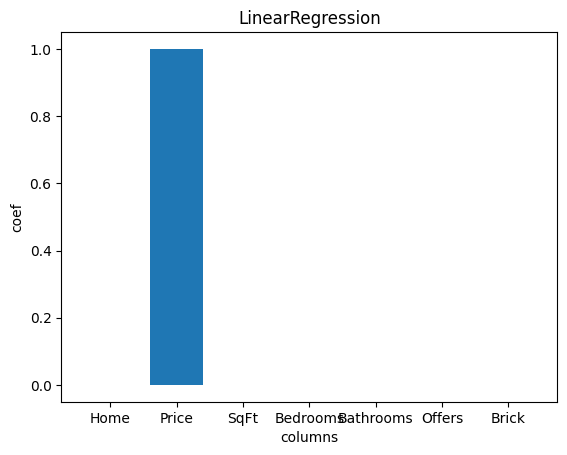

In [40]:
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [41]:
#lasso regression (for feature selection)
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

76.98646740369755

In [54]:
print(mean_squared_error(y_test, la.predict(x_test)))

print(mean_absolute_error(y_test, la.predict(x_test)))

np.sqrt(mean_squared_error(y_test, la.predict(x_test)))

0.18936655026551688
0.35622132898449554


0.43516267103867823

In [42]:
x=df.iloc[:,:-1]

In [43]:
la.coef_

array([ 0.        ,  0.52128083,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ])

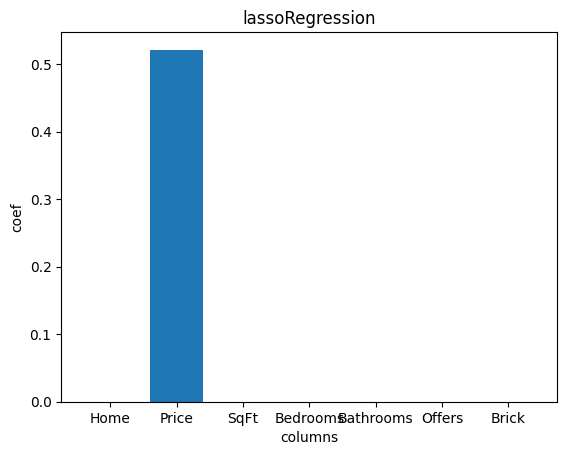

In [55]:
plt.bar(x.columns,la.coef_)
plt.title("lassoRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [45]:
#ridge regression
ri=Ridge(alpha=0.5)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

99.98509980877338

In [57]:
print(mean_squared_error(y_test, ri.predict(x_test)))

print(mean_absolute_error(y_test, ri.predict(x_test)))

np.sqrt(mean_squared_error(y_test, ri.predict(x_test)))

0.0001226060275219863
0.009234903635591844


0.01107276060980216

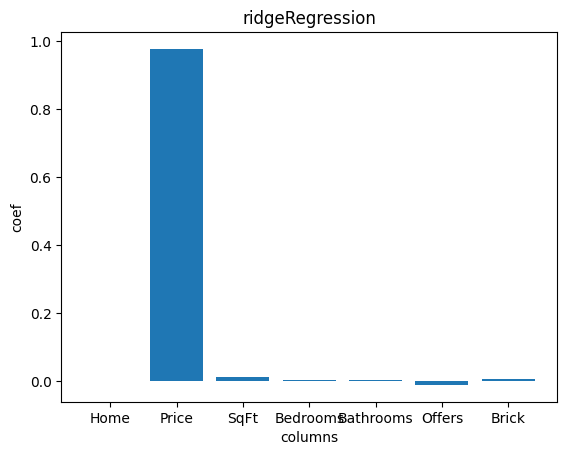

In [56]:
plt.bar(x.columns,ri.coef_)
plt.title("ridgeRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [59]:
print(lr.coef_)
print(la.coef_)
print(ri.coef_)

[-9.52298154e-17  1.00000000e+00  1.11022302e-16  2.22044605e-16
  1.66533454e-16 -4.99600361e-16  0.00000000e+00]
[ 0.          0.52128083  0.          0.          0.         -0.
  0.        ]
[-7.87062289e-04  9.77811495e-01  1.17938452e-02  4.58496380e-03
  3.76758182e-03 -1.10328234e-02  6.73974158e-03]


In [61]:
x.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick'], dtype='object')

In [66]:
#all three

df2=pd.DataFrame(lr.coef_,index=x.columns)
df2

,0
Home,-9.522982e-17
Price,1.000000e+00
SqFt,1.110223e-16
Bedrooms,2.220446e-16
Bathrooms,1.665335e-16
Offers,-4.996004e-16
Brick,0.000000e+00


In [70]:
df3=pd.DataFrame(la.coef_,index=x.columns)  
df3

,0
Home,0.000000
Price,0.521281
SqFt,0.000000
Bedrooms,0.000000
Bathrooms,0.000000
Offers,-0.000000
Brick,0.000000


In [71]:
df4=pd.DataFrame(ri.coef_,index=x.columns)
df4

,0
Home,-0.000787
Price,0.977811
SqFt,0.011794
Bedrooms,0.004585
Bathrooms,0.003768
Offers,-0.011033
Brick,0.006740


In [74]:
#all three in one table with col name
df5=pd.concat([df2,df3,df4],axis=1)
df5

,0,0,0
Home,-9.522982e-17,0.000000,-0.000787
Price,1.000000e+00,0.521281,0.977811
SqFt,1.110223e-16,0.000000,0.011794
Bedrooms,2.220446e-16,0.000000,0.004585
Bathrooms,1.665335e-16,0.000000,0.003768
Offers,-4.996004e-16,-0.000000,-0.011033
Brick,0.000000e+00,0.000000,0.006740
